Group 1:
1. Ashir
2. Tesfay

## Dataset

### Features

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable
    * 1 if tract bounds river
    * 0 otherwise
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per '\$10,000'
11. PTRATIO - pupil-teacher ratio by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in $1000's

In [8]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [2]:
boston_df = pd.read_csv("/content/boston_housing.csv")
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
# Index has nothing to do wth the prediction so we are dropping it
boston_df = boston_df.drop("Unnamed: 0", axis = 1)

In [4]:
# Check for missing values
boston_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


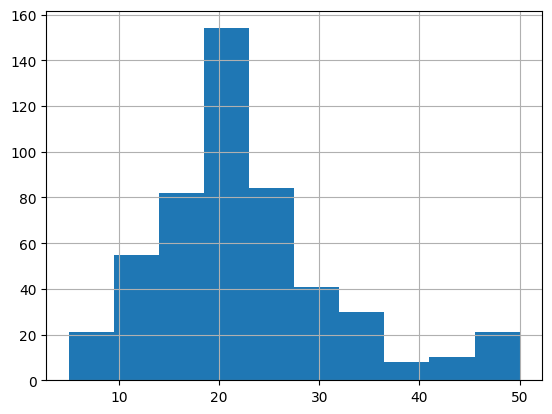

In [5]:
# Distribution of the target column MEDV column

boston_df.MEDV.hist()
plt.show()

In [6]:
# Renaming the MEDV column to price for simplicity
boston_df.rename(columns={"MEDV": "price"}, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


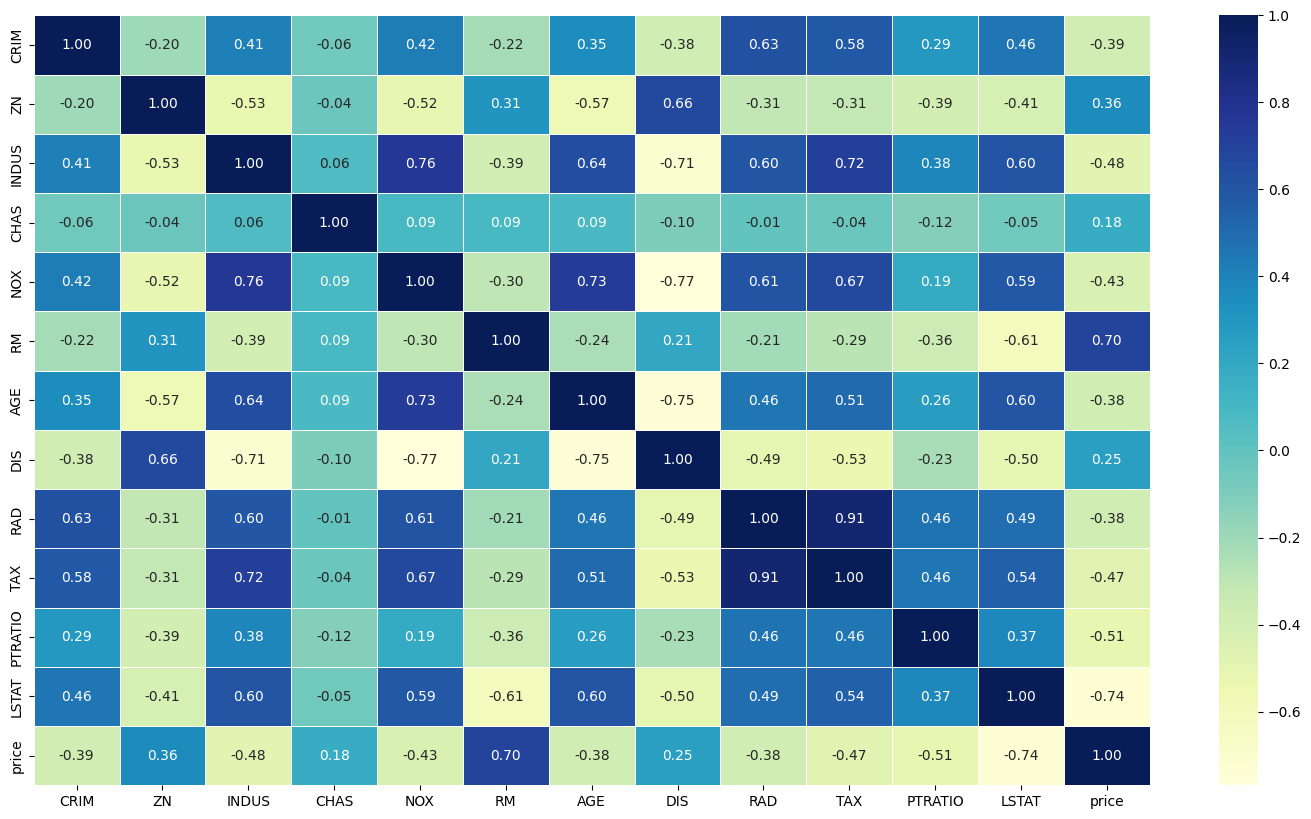

In [9]:
# Correlation matrix using heatmap
corr_matrix = boston_df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [10]:
# We set a correlation threshold to be 0.2

# Calculate the correlation matrix between all features
correlation_matrix = boston_df.corr()

# Extract correlations with 'price' (including 'price' itself)
correlation_with_price = correlation_matrix['price']

# Filter features based on correlation thresholds less than 0.2 absolute value
filtered_columns = correlation_with_price.index[
    (correlation_with_price.abs() > 0.2)
]



df = boston_df[filtered_columns]
df.shape

(506, 12)

In [11]:
# Split into independent features and dependent variable
np.random.seed(42)

X = df.drop('price', axis=1)
y = df['price']

In [12]:
# Split into train and test datasets
np.random.seed(12)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [13]:
# Let's try the Linear regression model
np.random.seed(12)

# Instantiate Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)


0.7424828654443807

In [14]:
# Let's try the Ridge regression model
np.random.seed(12)

# Instantiate Ridge Regression model
rg_model = Ridge()
rg_model.fit(X_train, y_train)
rg_model.score(X_test, y_test)

0.7407604881938763

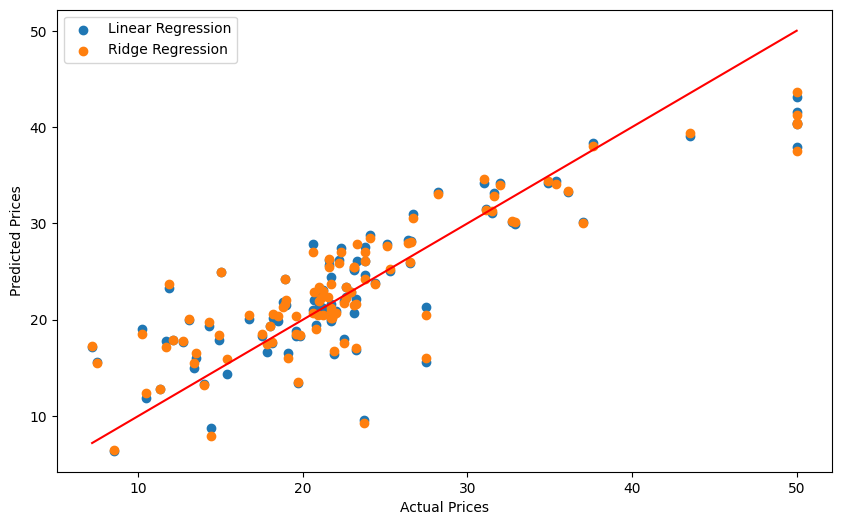

In [15]:
plt.figure(figsize=(10, 6))

y_preds_lr = lr_model.predict(X_test)
plt.scatter(y_test, y_preds_lr, label='Linear Regression')

y_preds_rg = rg_model.predict(X_test)
plt.scatter(y_test, y_preds_rg, label='Ridge Regression')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

Both Linear and Ridge regression produced somewhat similar results, so we are now exploring Random Forest.

In [16]:
# Lets try the Random Forest Regressor model

np.random.seed(12)

# Instantiate Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8723340051272188

In [17]:
# Create fucntion to evaluate model on a few different labels
def show_scores(model):
    y_preds = model.predict(X_test)
    scores = {"MAE": mean_absolute_error(y_test, y_preds),
              "MSE": mean_squared_error(y_test, y_preds),
              "R^2": r2_score(y_test, y_preds)}
    return scores

In [18]:
# Linear regression
show_scores(lr_model)

{'MAE': 3.3709429759409844,
 'MSE': 21.041801299908197,
 'R^2': 0.7424828654443807}

In [19]:
# Ridge regression
show_scores(rg_model)

{'MAE': 3.3861131661830988,
 'MSE': 21.18253725493945,
 'R^2': 0.7407604881938763}

In [20]:
# Random Forest
show_scores(rf_model)

{'MAE': 2.25578431372549, 'MSE': 10.431626235294107, 'R^2': 0.8723340051272188}

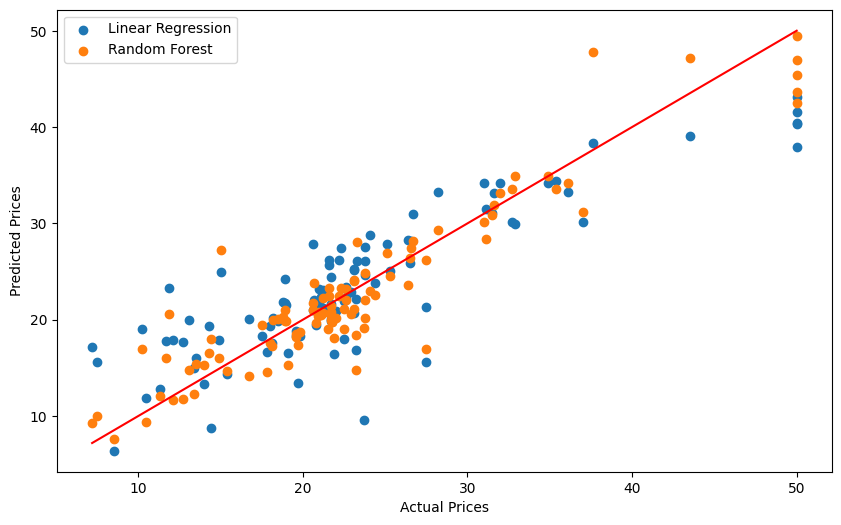

In [21]:
plt.figure(figsize=(10, 6))

y_preds_rg = lr_model.predict(X_test)
plt.scatter(y_test, y_preds_lr, label='Linear Regression')

y_preds_rf = rf_model.predict(X_test)
plt.scatter(y_test, y_preds_rf, label='Random Forest')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [22]:
df1 = pd.DataFrame(data={"Actual values":y_test,
                         "Predicted values":y_preds_rf})
df1["Differences"] = df1["Predicted values"] - df1["Actual values"]
df1


,Actual values,Predicted values,Differences
334,20.7,23.771,3.071
394,12.7,11.724,-0.976
404,8.5,7.571,-0.929
236,25.1,26.969,1.869
307,28.2,29.277,1.077
...,...,...,...
458,14.9,16.037,1.137
263,31.0,30.167,-0.833
433,14.3,16.522,2.222
275,32.0,33.192,1.192


In [23]:
# Plot feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)).reset_index(drop=True)

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

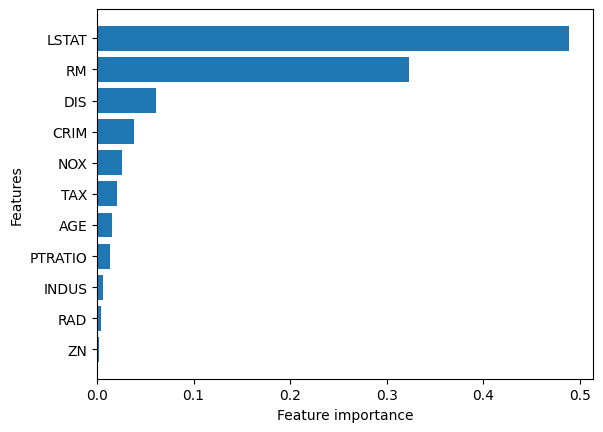

In [24]:
plot_features(X_train.columns, rf_model.feature_importances_)

### Summary
Key Metrics Comparison:

 * `MAE`: Linear Regression has an MAE of `3.37`, while Random Forest Regression has a lower MAE of `2.26`.
    So, Random Forest Regression performs better, having fewer average errors overall.
    
    
 * `MSE`: Linear Regression's MSE score is `21.04`, while Random Forest scored `10.43` in MSE.
    As a result, Random Forest has significantly smaller squared errors, meaning it handles larger errors better than Linear Regression.
    
    
  * `R²`:  In this metric, Linear Regression has an R² score of `0.7424`, while Random Forest observed to score a higher R² of `0.8723`. Therefore, again, Random Forest outperformed Linear Regression in terms of R², explaining 87.23% of the variance compared to Linear Regression's 74.24%.


Pros and Cons of the Two Models:

* `Linear Regression (Higher MAE and MSE Errors, Lower R²):`
  * Pros:
    * Less prone to overfitting
  * Cons:
    * Less accurate predictions
    * Prone to underfitting
* `Random Forest (Lower MAE and MSE Errors, Higher R²):`
  * Pros:
    * More precise predictions with smaller errors.
  * Cons:
    * Risk of overfitting if hyperparameter tunning is applied  


`Random Forest` is the preferred choice here based on its superior overall performance. It consistently performs better across all metrics: it has lower `MAE` and `MSE`, meaning it makes fewer errors, and a higher `R²`, which shows it captures more of the variance in the data. This implies that Random Forest has better predictive accuracy and is likely to generalize more effectively to new, unseen data.


`Linear Regression` showed a reasonable performance but with higher errors and a lower ability to explain the variance in the data, as shown by the lower R² score (0.74). Whereas `Random Forest`, with its lower MAE (2.26) and MSE (10.43), provides more accurate predictions and captures more of the variability in the data, as seen in the higher R² score (0.87). This implies that Random Forest has a better overall fit, leading to improved performance on both training and unseen data.
